In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_data = pd.read_csv('embedding_similarity.csv')

In [3]:
df_data.head()

,question_1,question_2,similar,glove_mean,glove_min,glove_max,fasstext_mean,fasstext_min,fasstext_max,elmo_mean,elmo_min,elmo_max,flair_mean,flair_min,flair_max
0,What is a novel coronavirus?,What is a new coronavirus?,1,0.969663,0.962320,0.953024,0.986088,0.964997,0.961819,0.916189,0.965656,0.961327,0.956704,0.955254,0.951432
1,Why is the disease being called coronavirus di...,Why is the name of the disease coronavirus dis...,1,0.987822,0.973520,0.980981,0.994423,0.993324,0.988986,0.939447,0.947040,0.950697,0.970791,0.968950,0.969814
2,Why might someone blame or avoid individuals a...,What would be the reason to blame or avoid ind...,1,0.985725,0.987596,0.979712,0.992363,0.980096,0.981828,0.945514,0.948790,0.960128,0.962739,0.963922,0.964409
3,How can people help stop stigma related to COV...,What can be done to stop stigma related to COV...,1,0.985724,0.987656,0.986240,0.988362,0.981589,0.978043,0.930974,0.946333,0.939386,0.954533,0.959984,0.957737
4,What is the source of the virus?,Where does the virus come from?,1,0.936900,0.901894,0.861867,0.961313,0.926174,0.891326,0.811464,0.877028,0.864786,0.874726,0.879345,0.878291


In [4]:
def get_cols(embedding, cols):
    col_list = []
    for col in cols:
        if embedding in col:
            col_list.append(col)
    return col_list

def plot_similarity_hist(embedding, title):
    col_list = get_cols(embedding,df_data.columns)
    fig, axes = plt.subplots(1, 3, figsize=(20, 3), sharex=True)
    for idx,col_name in enumerate(col_list):
        x = df_data[df_data['similar'] == 1][col_name]
        y = df_data[df_data['similar'] == 0][col_name]
        sns.distplot(x, kde=False, label="similar", ax=axes[idx])
        sns.distplot(y, kde=False, label="not-similar", ax=axes[idx])
    plt.legend()

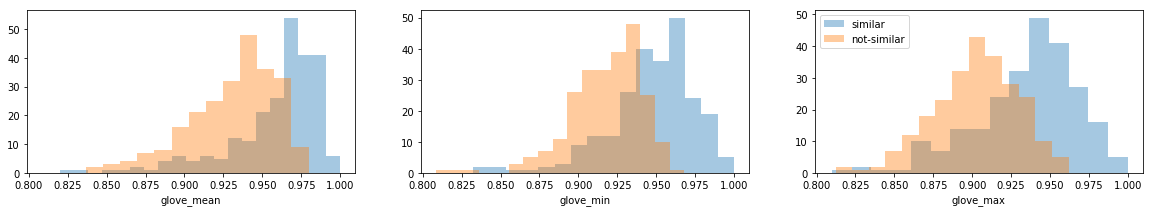

In [5]:
plot_similarity_hist('glove', 'Distribution of similarity scores for similar and not-similar pairs of questions')

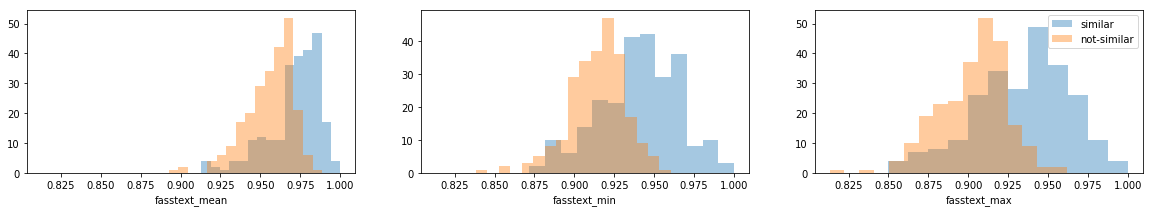

In [6]:
plot_similarity_hist('fasstext', 'Distribution of similarity scores for similar and not-similar pairs of questions')

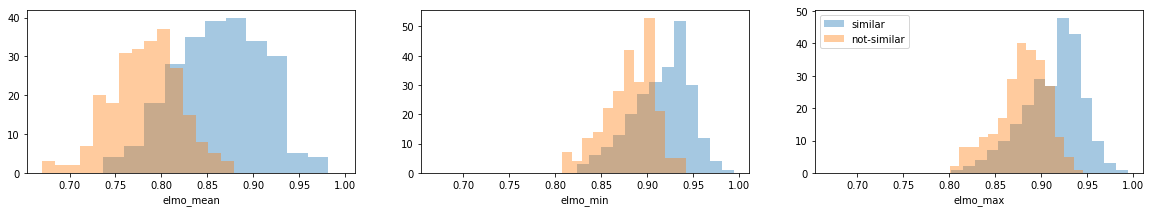

In [7]:
plot_similarity_hist('elmo', 'Distribution of similarity scores for similar and not-similar pairs of questions')

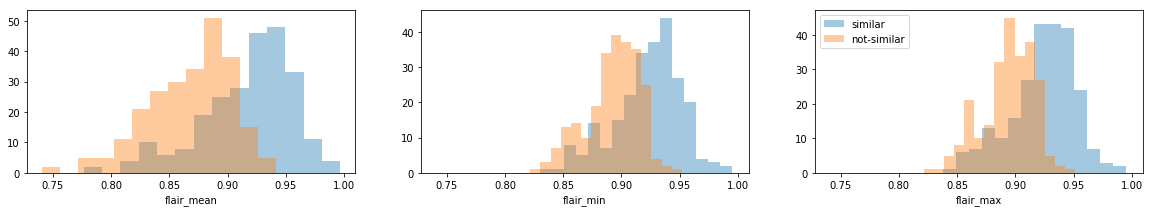

In [8]:
plot_similarity_hist('flair', 'Distribution of similarity scores for similar and not-similar pairs of questions')

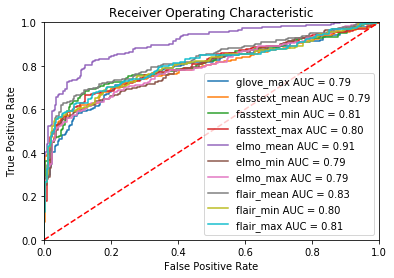

<Figure size 2880x1440 with 0 Axes>

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
col_names = df_data.columns[2:]
for i in range(3,len(col_names)):
    # calculate the fpr and tpr for all thresholds of the classification
    fpr, tpr, threshold = roc_curve(df_data['similar'], df_data[col_names[i]])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = col_names[i] + ' AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.figure(figsize=(40,20))
plt.show()